In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
def show(name, n, m, i, Title):
    plt.subplot(n, m, i)  # Create a subplot
    plt.imshow(name, cmap='gray')  # Display the image in grayscale
    plt.title(Title)  # Set the title
    plt.axis('off')  # Turn off axes

In [8]:
import cv2

below is the code to captue an image for camera feed , press spacebar to save the image , the code saves image as "test_image".

In [9]:
import cv2  # Import OpenCV

# Initialize the camera (0 = default camera)
camera = cv2.VideoCapture(0)

# Check if the camera opened successfully
if not camera.isOpened():
    print("Error: Could not open camera.")
else:
    print("Press 'Spacebar' to capture the image and 'Esc' to exit.")

# Continuously read from the camera
while True:
    ret, frame = camera.read()  # Read a frame from the camera
    
    if not ret:
        print("Error: Could not read frame.")
        break

    # Display the live video feed
    cv2.imshow('Camera Feed - Press Spacebar to Capture', frame)

    # Check for key presses
    key = cv2.waitKey(1)  # Wait for 1 ms for a key press
    
    if key == 27:  # Press 'Esc' key to exit the loop
        print("Exiting without saving.")
        break
    elif key == 32:  # Press 'Spacebar' to capture the image
        image_name = "test_image.png"
        cv2.imwrite(image_name, frame)  # Save the captured frame as an image
        print(f"Image saved as '{image_name}'")
        break

# Release the camera and close all OpenCV windows
camera.release()
cv2.destroyAllWindows()


Press 'Spacebar' to capture the image and 'Esc' to exit.
Image saved as 'test_image.png'


In [12]:
# Path to the already captured image
image_path = "test_image.png"

# Step 1: Read the captured image
image = cv2.imread(image_path)

In [13]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Display the grayscale image

In [15]:
threshold_value = 130
    
    # Step 3: Apply the thresholding
_, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
# Display the thresholded image

In [21]:



    # Step 3: Divide the range of 0-255 into 16 levels
    # Create an empty image to store the thresholded values
thresholded_image_2 = np.zeros_like(gray_image)

    # Step 4: Map the pixel values into one of the 16 gray levels
for i in range(16):
        # Calculate the lower and upper bound for the i-th gray level
        lower_bound = i * 16
        upper_bound = (i + 1) * 16 - 1
        thresholded_image_2[(gray_image >= lower_bound) & (gray_image <= upper_bound)] = i * 16

   


In [25]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply Sobel filter for edge detection
    # Sobel in X direction
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    # Sobel in Y direction
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Combine the Sobel X and Y results to get the total edge magnitude
sobel_edges = cv2.magnitude(sobel_x, sobel_y)
    
    # Convert to 8-bit image for display
sobel_edges = np.uint8(np.absolute(sobel_edges))

    # Step 4: Apply Canny edge detection
    # Set the lower and upper threshold for the Canny detector
canny_edges = cv2.Canny(gray_image, 100, 200)

In [26]:
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
#apply the gaussian filter to the image

In [27]:
sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]])

    # Step 3: Apply the sharpening filter using cv2.filter2D()
sharpened_image = cv2.filter2D(blurred_image, -1, sharpening_kernel)
# Display the sharpened image

In [28]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert the image to RGB

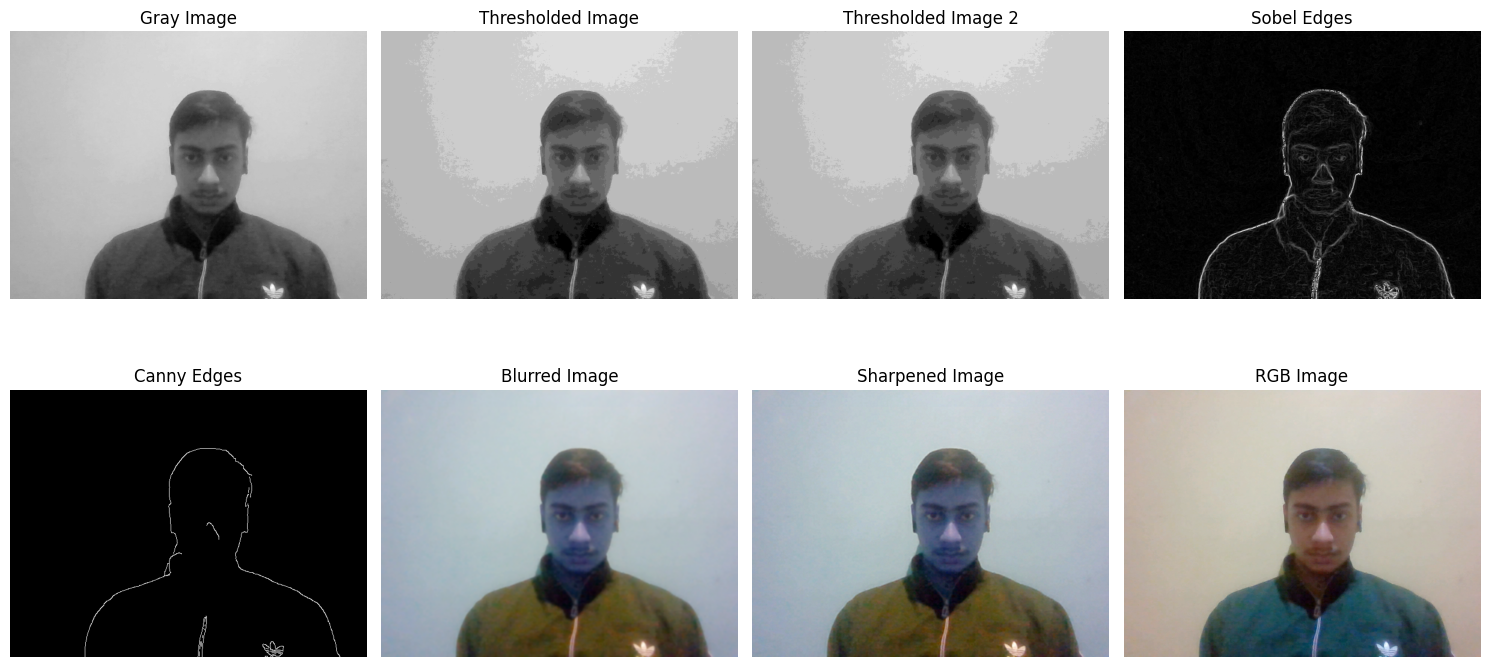

In [29]:
import matplotlib.pyplot as plt

# Assuming the images are already defined (gray_image, thresholded_image, etc.)

def show(name, n, m, i, Title):
    plt.subplot(n, m, i)  # Create a subplot in the 2x4 grid
    plt.imshow(name, cmap='gray')  # Display the image in grayscale
    plt.title(Title)  # Set the title of the image
    plt.axis('off')  # Turn off axes

# Set up the figure with 2 rows and 4 columns
plt.figure(figsize=(15, 8))

# Display each image in the grid with the appropriate title
show(gray_image, 2, 4, 1, 'Gray Image')
show(thresholded_image, 2, 4, 2, 'Thresholded Image')
show(thresholded_image_2, 2, 4, 3, 'Thresholded Image 2')
show(sobel_edges, 2, 4, 4, 'Sobel Edges')
show(canny_edges, 2, 4, 5, 'Canny Edges')
show(blurred_image, 2, 4, 6, 'Blurred Image')
show(sharpened_image, 2, 4, 7, 'Sharpened Image')
show(rgb_image, 2, 4, 8, 'RGB Image')

# Display the grid of images
plt.tight_layout()  # Ensure the images fit within the figure
plt.show()
